first generation


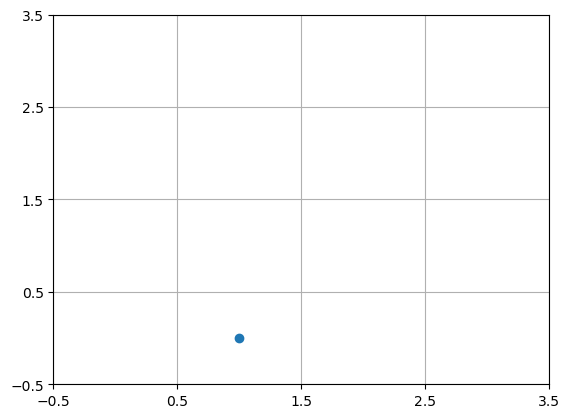

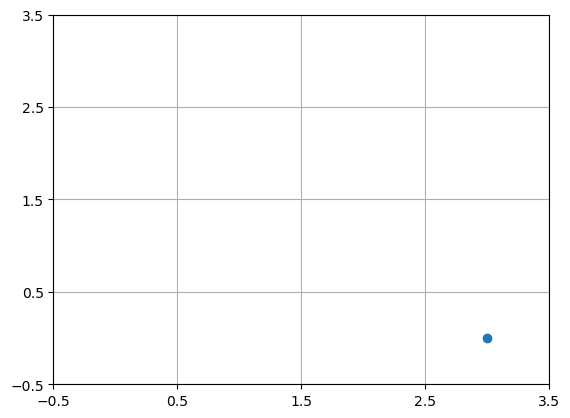

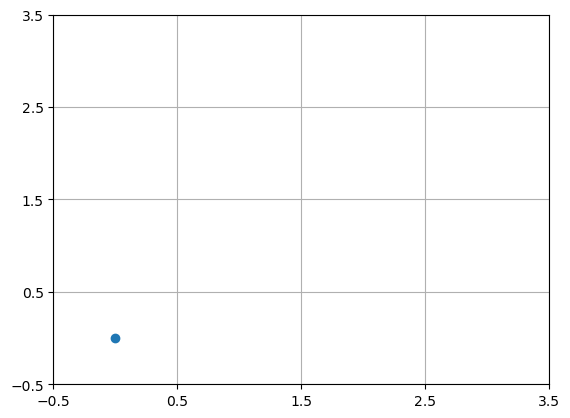

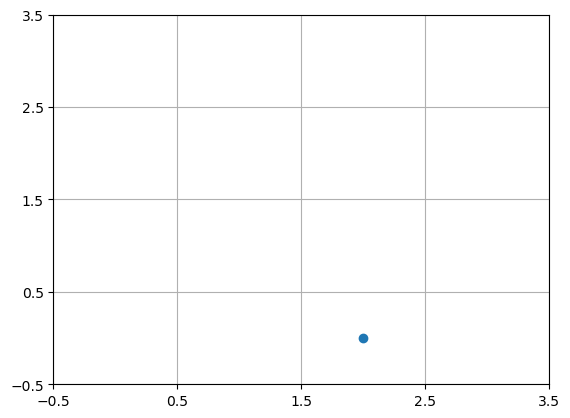

new base
this index flavour:  Q
this index flavour:  O
this index flavour:  Q
new successor
new base
this index flavour:  Q
this index flavour:  O
this index flavour:  Q
new successor
new successor
new base
this index flavour:  Q
this index flavour:  O
this index flavour:  Q
new successor
new successor
new base
this index flavour:  Q
this index flavour:  O
this index flavour:  Q
new successor
second pass of trees


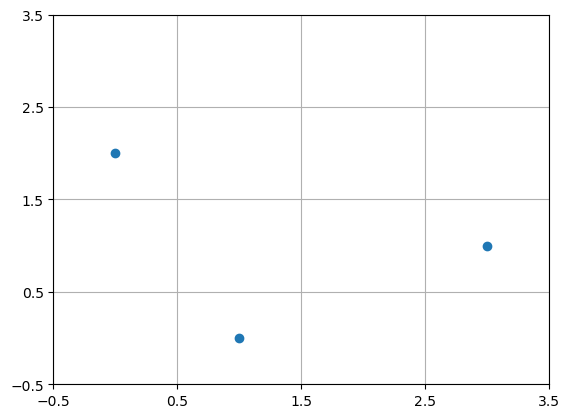

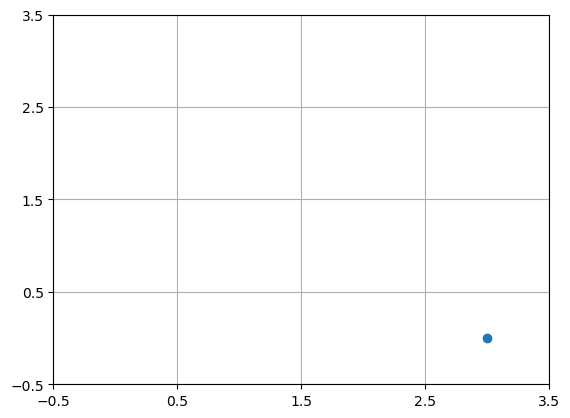

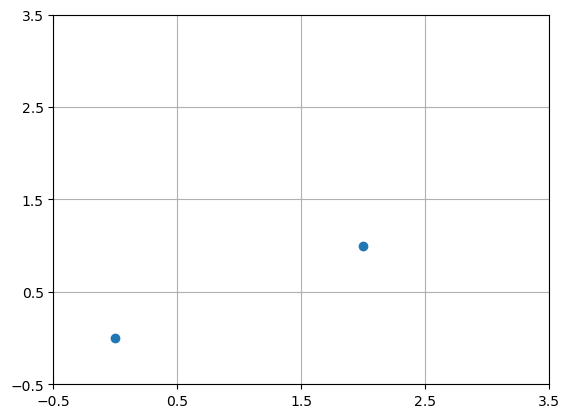

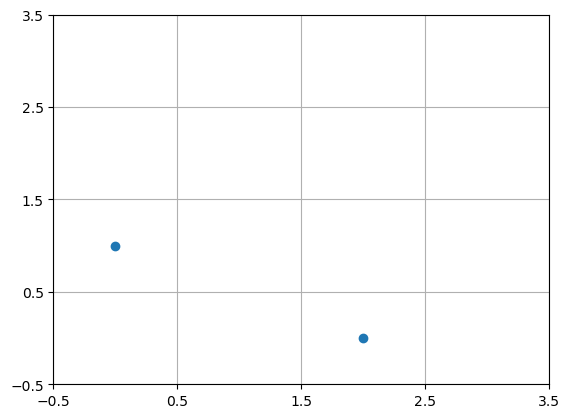

next generation


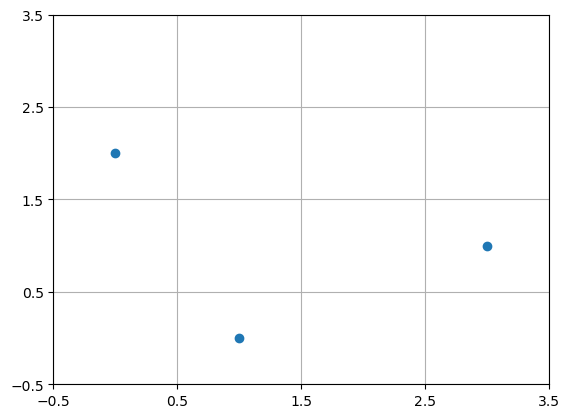

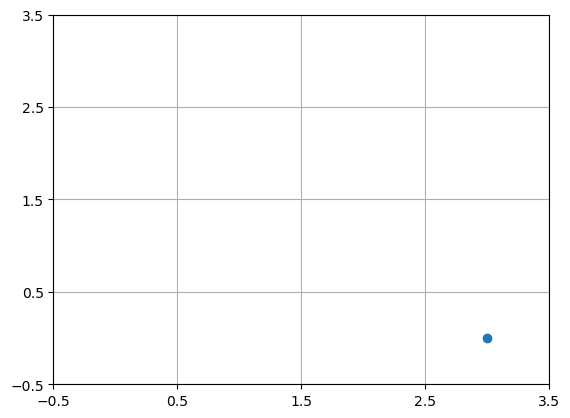

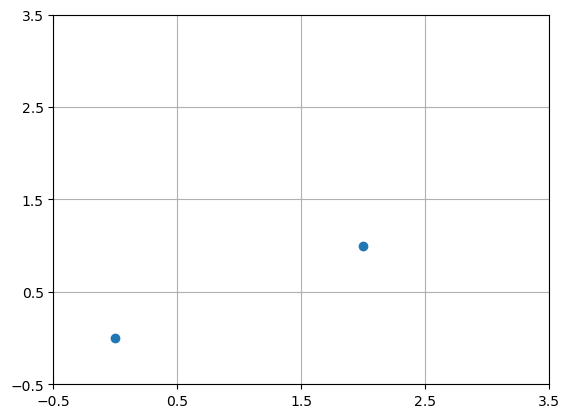

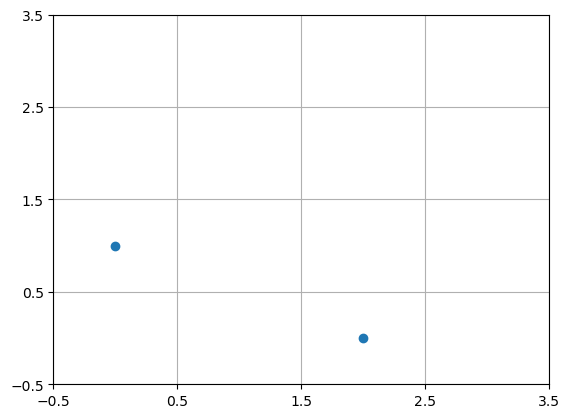

In [2]:
"""
NQLL-p
N-queens linked lists python version
Dr Keith Reid
Coding Club
Jan 2024
"""

import numpy as np
import matplotlib.pyplot as plt

class Config:
    def __init__(self):
        self.n = get_n()

class Node:
    def __init__(self, x, y, prev, succ, flavour):        
        self.x          = x
        self.y          = y
        self.prev       = prev
        self.succ       = succ
        self.flavour    = flavour

def get_n():
    n                   = 4
    return n

def get_config():
    config = Config()
    return config

def count_diagonal_intersections(coords, current):
    
    # 000000
    # 000000
    # 0I0IU0
    # 00C000
    # 000000
    # 000000
    
    coords_x                = coords[0]
    coords_y                = coords[1]
    succ_height             = current.y+1
    height                  = succ_height - coords_y
    left_intersect_x        = coords_x   - height 
    right_intersect_x       = coords_x   + height 
    diagonal_intersections  = [[left_intersect_x, succ_height],[right_intersect_x, succ_height]]
    return diagonal_intersections

def count_successors(base, index, board_squares):
        prior_coords    = read_node_path(base)
        taken_xs        = list(set(list([xy[0] for xy in prior_coords])))                                        
        options         = [other   for other   in board_squares if other != index]
        next_ups        = [option  for option  in options       if option.y == index.y+1]
        not_taken       = [next_up for next_up in next_ups      if next_up.x not in taken_xs]
        diag_bans       = []
        for this_xy in prior_coords:
            banned_cells    = count_diagonal_intersections(this_xy, index)
            left_diag_ban   = banned_cells[0][0]
            right_diag_ban  = banned_cells[1][0]
            diag_bans.append(left_diag_ban)
            diag_bans.append(right_diag_ban)
        successors      = set([this_not_taken for this_not_taken in 
                       not_taken if this_not_taken.x not in diag_bans])
        return successors
    
def init_dyad():
                
    config      = get_config()
    n           = config.n
    # name     type  x    y    prev          succ     flav
    alpha       = Node(0.5, -1,  'before',   None,    'A')
    omega       = Node(0.5,  n+1,  None,    'after',  'O')
    alpha.succ  = omega
    omega.prev  = alpha
    dyad        = [alpha, omega]
    return dyad

def read_node_path(this_node):
    path           = []
    this_node_xy   = [this_node.x, this_node.y]
    path.append(this_node_xy)
    while this_node.succ != 'after':
        next_node = this_node.succ
        next_x    = next_node.x
        next_y    = next_node.y
        next_xy   = [next_x, next_y]
        path.append(next_xy)
        this_node = next_node
    return path

def set_up_board_squares(dyad):
    config           = get_config()
    board_squares    = set(dyad)
    for i in range(config.n):
        for j in range(config.n):
            this_queen = Node(i,j,None,omega,'Q')
            board_squares.add(this_queen)
    return board_squares
    
def draw(path):
        
    fig = plt.figure()
    plt.xlim(-0.5, config.n-0.5)
    plt.ylim(-0.5, config.n-0.5)
    ax  = fig.gca()
    ax.set_xticks(np.arange(-0.5, config.n+0.5, 1))
    ax.set_yticks(np.arange(-0.5, config.n+0.5, 1))
    plt.scatter([p[0] for p in path],[p[1] for p in path])
    plt.grid()
    plt.show()
    
if __name__=="__main__":
    
    config          = get_config()
    dyad            = init_dyad()
    alpha           = dyad[0]
    omega           = dyad[1]
    
    board_squares   = set_up_board_squares(dyad)
    trees           = set()

    # trial of each nodes options
           
    base            = alpha
    index           = alpha
    successors      = count_successors(base, index, board_squares)
    
    for this_successor in successors:
        base                = Node(alpha.x, alpha.y, alpha.prev, alpha.succ, alpha.flavour)
        terminus            = Node(omega.x, omega.y, omega.prev, omega.succ, omega.flavour)
        this_successor.prev = base
        base.succ           = this_successor
        this_successor.succ = terminus
        terminus.prev       = this_successor
        trees.add(base)
    
    print("first generation")
    for this_tree in trees:
        this_path = read_node_path(this_tree)
        draw(this_path)
        
    # so to recap we now have n=config.n trees
    # each tree starts with base which is like alpha, then a first-row Q, then omega
    
    next_generation = set()
    
    for this_base in trees:
        print("new base")
        board_squares   = set_up_board_squares(dyad)
        this_index      = this_base
        while this_index.flavour != 'O':
            this_index = this_index.succ
            print("this index flavour: ", this_index.flavour)
        this_index = this_index.prev
        print("this index flavour: ", this_index.flavour)
        successors = count_successors(this_base, this_index, board_squares)
        for this_successor in successors:
            print("new successor")
            this_successor.prev = this_index
            this_index.succ     = this_successor
            this_successor.succ = terminus
            terminus.prev       = this_successor
            next_generation.add(this_base)
    
    print("second pass of trees")
    for this_tree in trees:
        this_path = read_node_path(this_tree)
        draw(this_path)
        
    print("next generation")
    for this_tree in next_generation:
        this_path = read_node_path(this_tree)
        draw(this_path)
            


In [29]:
def test_count_diagonal_intersections():
    coords  = [2,2]
    current = Node(4,3,'_','_','Q')
    diagonal_intersections = count_diagonal_intersections(coords, current)
    assert diagonal_intersections == [[0,4],[4,4]]
    print("Passed read path from node")
    
def test_count_successors():
    config          = get_config()
    dyad            = init_dyad()
    alpha           = dyad[0]
    board_squares   = set_up_board_squares(dyad)
    base            = alpha
    index           = alpha
    successors      = count_successors(base, index, board_squares)
    assert isinstance(successors, set)
    assert all([isinstance(x, Node) for x in successors])
    assert 0 <= len(successors) <= config.n 
    print("Passed count successors")
    
def test_init_dyad():
    dyad = init_dyad()
    alpha = dyad[0]
    omega = dyad[1]
    assert isinstance(dyad, list)
    assert isinstance(alpha, Node)
    assert isinstance(omega, Node)
    assert alpha != omega
    assert alpha.flavour == 'A'
    assert omega.flavour == 'O'
    assert alpha.x == 0.5
    assert alpha.y == -1
    assert alpha.succ == omega
    assert omega.prev == alpha
    assert omega.x    == alpha.x
    assert omega.y > alpha.y
    print("Passed init alpha omega")

def test_read_node_path():
    config   = get_config()
    n        = config.n
    dyad     = init_dyad()
    alpha    = dyad[0]
    path     = read_node_path(alpha)
    assert path[0] == [0.5,-1]
    assert path[1][0] == 0.5
    dyad         = init_dyad()
    alpha        = dyad[0]
    omega        = dyad[1]
    beta         = Node(0, 0, alpha, omega, 'Q')
    alpha.succ   = beta
    omega.prev   = beta
    path         = read_node_path(alpha)
    assert path == [[0.5, -1], [0, 0], [0.5, n+1]]
    dyad         = init_dyad()
    alpha        = dyad[0]
    omega        = dyad[1]
    beta         = Node(1, 1, alpha, omega, 'Q')
    alpha.succ   = beta
    omega.prev   = beta
    path         = read_node_path(alpha)
    assert path == [[0.5, -1], [1, 1], [0.5, n+1]]
    
    print("Passed read path from node")
    
def test_set_up_board_squares():
    config   = get_config()
    n        = config.n
    dyad     = init_dyad()
    board_squares = set_up_board_squares(dyad)
    
    assert isinstance(board_squares, set)
    assert len(board_squares) == config.n ** 2 + 2
    print("passed set up board squares")

def tests():
    test_count_diagonal_intersections()
    test_count_successors()
    test_init_dyad()
    test_read_node_path()
    test_set_up_board_squares()
    print("Passed all tests")
    
tests()

Passed read path from node
Passed count successors
Passed init alpha omega
Passed read path from node
passed set up board squares
Passed all tests
